# Imports

In [140]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras_metrics
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from sklearn.model_selection import RandomizedSearchCV 

np.random.seed(123)

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

!{sys.executable} -m pip install opencv-python

import time
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.metrics import roc_curve#, plot_roc_curve

np.random.seed(123)

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import make_pipeline

import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import roc_curve, plot_roc_curve
import densenet

ImportError: cannot import name 'plot_roc_curve'

In [134]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
test_folder = '../data/test'
train_folder = '../data/train'
val_folder = '../data/val'

In [3]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64,64), batch_size = 627) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64,64), batch_size = 19)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64,64), batch_size=5219)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [6]:
train_img.shape

(5216, 12288)

model | accuracy | recall
--- | --- | --- |
baseline | .75 | 
CNN | 0.55 | 0.74 - 0.88

## Build a baseline model (fully connected)
- Accuracy for train: .99 </br>
- Accuracy for val: .81 </br>
- Our model is overfitting
- Create a new model with dropout

In [10]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=16,
                    validation_data=(val_img, val_y), verbose = 1)

Train on 5216 samples, validate on 16 samples
Epoch 1/50
5216/5216 [==============================] - 1s 128us/step - loss: 0.4246 - accuracy: 0.8085 - val_loss: 0.6164 - val_accuracy: 0.7500
Epoch 2/50
5216/5216 [==============================] - 0s 95us/step - loss: 0.2656 - accuracy: 0.8923 - val_loss: 0.4456 - val_accuracy: 0.8125
Epoch 3/50
5216/5216 [==============================] - 0s 81us/step - loss: 0.2024 - accuracy: 0.9225 - val_loss: 0.5388 - val_accuracy: 0.8125
Epoch 4/50
5216/5216 [==============================] - 0s 83us/step - loss: 0.1831 - accuracy: 0.9262 - val_loss: 0.8253 - val_accuracy: 0.6250
Epoch 5/50
5216/5216 [==============================] - 0s 86us/step - loss: 0.1654 - accuracy: 0.9329 - val_loss: 1.0173 - val_accuracy: 0.6250
Epoch 6/50
5216/5216 [==============================] - 0s 83us/step - loss: 0.1469 - accuracy: 0.9431 - val_loss: 0.3601 - val_accuracy: 0.8750
Epoch 7/50
5216/5216 [==============================] - 0s 87us/step - loss: 0.1365

In [12]:
results_train = model.evaluate(train_img, train_y)

5216/5216 [==============================] - 0s 27us/step


In [13]:
results_train

[0.07644408498747857, 0.970475435256958]

In [14]:
results_val = model.evaluate(val_img, val_y)

16/16 [==============================] - 0s 84us/step


In [15]:
results_val

[0.6636800765991211, 0.75]

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                245780    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________


# CNN

In [268]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64 ,64,  3)))

model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Dropout(0.1))  

model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Dropout(0.05))  

model.add(layers.Conv2D(18, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.0025)) 


model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [269]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

history = model.fit(train_images,
                    train_y,
                    epochs=5,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=0)

In [270]:
results_train = model.evaluate(train_images, train_y)

5216/5216 [==============================] - 7s 1ms/step


In [271]:
results_test = model.evaluate(val_images, val_y)

16/16 [==============================] - 0s 1ms/step


In [272]:
results_train

[0.18965857338868766, 0.9298312883435583, 0.8545861296901874]

In [273]:
results_test

[0.8794382810592651, 0.625, 0.249999996875]

In [252]:
model.predict_classes(val_images)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [253]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 62, 62, 6)         168       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 20, 20, 6)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 18, 18, 12)        660       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 6, 6, 12)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 4, 4, 18)          1962      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 1, 1, 18)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 18)                0         
__________

---

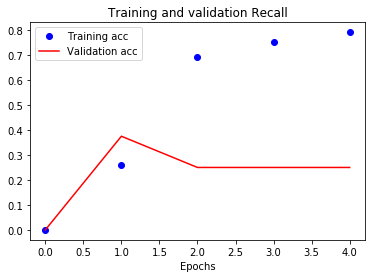

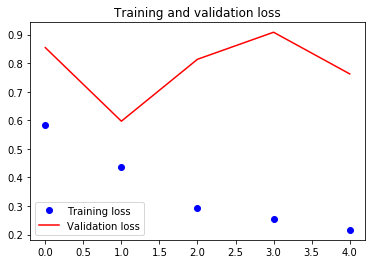

In [254]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = history.history['recall']
val_rec = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Confusion Matrix, without normalization
[[3721  154]
 [ 211 1130]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      3875
         1.0       0.88      0.84      0.86      1341

    accuracy                           0.93      5216
   macro avg       0.91      0.90      0.91      5216
weighted avg       0.93      0.93      0.93      5216

roc_auc_score: 0.901456399894157


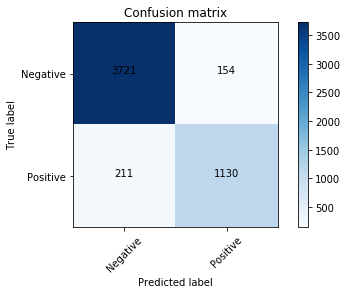

In [255]:
y_pred = model.predict_classes(train_images)

cm = confusion_matrix(train_y, y_pred)
classes = ['Negative', 'Positive']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(train_y, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(train_y, y_pred))

In [245]:
clf_van.fit(X_test, y_test)
y_pred_van = clf_van.predict(X_test)
y_prob_van = clf_van.predict_proba(X_test)

NameError: name 'clf_van' is not defined

In [143]:
fpr, tpr, thresholds = roc_curve(train_images, y_prob[:,1])
fpr_v, tpr_v, thresholds_v = roc_curve(y_test, y_prob_van[:,1])

NameError: name 'y_prob' is not defined

In [144]:
    def plot_roc_curve(fpr, tpr, label = None):
        plt.plot(fpr, tpr, linewidth =5 , label = label)
        plt.plot([0,1], [0,1], 'k--')
        plt.axis([0, 1, 0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

    plot_roc_curve(fpr_v, tpr_v, label = 'Vanilla')
    plot_roc_curve(fpr, tpr, label = 'Tuned Model')
    plt.legend()
    plt.show()

NameError: name 'fpr_v' is not defined